# Анализ данных о видеоиграх для интернет-магазина

# План выполнения проекта #

 [Шаг 1. Изучение общей информации](#step1)
 
 
 [Шаг 2. Подготовка данные](#step2)
 
 
 [Шаг 3. Исследовательский анализ данных](#step3)
 
 
 [Шаг 4. Составление портрета пользователя каждого региона](#step4)
 
 
 [Шаг 5. Проверка гипотез](#step5)

  
 [Шаг 6. Выводы](#step6)

## <a id="step1">Шаг 1. Изучение общей информации </a>

In [1]:
# импорт всех библиотек, необходимых для работы.

import pandas as pd

from scipy import stats as st
import numpy as np
import math
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()
display(games.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7386,The Land Before Time: Big Water Adventure,PS,2002.0,Platform,0.12,0.08,0.00,0.01,NaN,NaN,NaN
11415,FIFA Soccer 2005,GBA,2004.0,Sports,0.06,0.02,0.00,0.00,75.0,7.8,E
14385,Tokyo Xanadu eX+,PS4,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1937,Mortal Kombat: Armageddon,PS2,2006.0,Fighting,0.88,0.04,0.00,0.14,75.0,8.5,M
7929,Thomas the Tank Engine & Friends,GBA,2004.0,Adventure,0.13,0.05,0.00,0.00,NaN,NaN,NaN
12451,From The Abyss,DS,2008.0,Role-Playing,0.06,0.00,0.00,0.00,59.0,8,E
13913,Klonoa Heroes: Densetsu no Star Medal,GBA,2002.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
5480,Virtua Tennis 2009,X360,2009.0,Sports,0.12,0.18,0.00,0.03,70.0,6.2,E
5134,FIFA Street 2,PS2,2006.0,Sports,0.17,0.13,0.02,0.04,59.0,7.7,E
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M


In [3]:
display(games.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В датасете `games` 16715 строк и 11 колонок. Здесь собраны данные по играм - платформы, на которых они выпущены, когда выпущены, жанр, продажи по регионам, а также оценка игр критиками и пользователями, в том числе мы видим, что играм присвоен определенный рейтинг по возрасту.

Столбцы `Name` и `Genre` содержат по 2 пропуска. В данном анализе само название игры не нужно, а вот жанр - да. Стоит убрать строки с отсутствующим жанром, так как их очень мало, восстановлению не подлежат.

Также не везде указана дата релиза, нужно внимательнее посмотреть данные. Тут же мы видим, что тип данных в столбце `Year_of_release` - float, что неудобно.

В столбцах `Critic_Score` и `User_Score` не везде заполненны данные, примерно в половине случаев. Возможно, есть зависимость от платформы, не настолько популярная?

`Rating` был заполнен тоже не всегда, предположительно также из-за непопулярности платформы, а может это случайность.

Также нужно преобразовать названия столбцов, привести к нижнему регистру, поменять тип данных в `Year_of_release` и `User_Score`(object - не числовой тип). 

И посмотреть таблицу на наличие дубликатов.

## <a id="step2">Шаг 2. Подготовка данных </a>

### Замена названия столбцов

In [4]:
# Создадим словарь со старыми и новыми названиями столбцов.
games_dict_columns = {x: x.lower() for x in games.columns}
print(games_dict_columns)

games.columns = map(lambda x: games_dict_columns[x], games.columns)
games.info()

{'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Проверка на наличие дубликатов

In [5]:
print(games.duplicated().sum())

0


Полных дубликатов в датафрейме не имеется.

In [6]:
print(games['name'].duplicated().sum())
print(games['name'].value_counts().head(20))
display(games[games['name']=='Need for Speed: Most Wanted'])
display(games[games['name']=='FIFA Soccer 11'])

5155
Need for Speed: Most Wanted                12
FIFA 14                                     9
Madden NFL 07                               9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
FIFA Soccer 13                              8
LEGO Star Wars II: The Original Trilogy     8
Monopoly                                    8
LEGO The Hobbit                             8
LEGO Jurassic World                         8
LEGO Harry Potter: Years 5-7                8
Madden NFL 08                               8
Angry Birds Star Wars                       8
Lego Batman 3: Beyond Gotham                8
Terraria                                    8
FIFA 15                                     8
Cars                                        8
The LEGO Movie Videogame                    8
Surf's Up                                   7
LEGO The Lord of the Rings                  7
Name: name, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
202,FIFA Soccer 11,PS3,2010.0,Sports,0.61,3.28,0.06,1.12,89.0,8,E
369,FIFA Soccer 11,X360,2010.0,Sports,0.71,2.39,0.02,0.40,88.0,7.5,E
1687,FIFA Soccer 11,PSP,2010.0,Sports,0.13,0.69,0.01,0.36,68.0,5.4,E
1916,FIFA Soccer 11,Wii,2010.0,Sports,0.26,0.69,0.00,0.12,73.0,7.3,E
2696,FIFA Soccer 11,PS2,2010.0,Sports,0.11,0.29,0.00,0.36,NaN,6.6,E
2914,FIFA Soccer 11,DS,2010.0,Sports,0.13,0.49,0.00,0.08,63.0,tbd,E
8122,FIFA Soccer 11,PC,2010.0,Sports,0.00,0.14,0.00,0.04,83.0,7.7,E


На примере игры `Need for Speed` мы видим, что дубликатов явных тут нет - разные платформы или разные года выпуска. Полные дубликаты отсутствуют.

Мы можем предположить, раз полных дубликатов нет, то одна строка - это одна игра. Даже если она вышла в один год, но у нее разные продажи в регионах, то можно предположить, что это отдельно версия игры. Вполне возможно, limited edition. 

Проверим это.

In [7]:
# Создание таблицы с дубликатами по имени, платформе и году выпуска
games_duplicates = games.pivot_table(
    index=['name', 'platform', 'year_of_release'],
    values='na_sales',
    aggfunc='count').sort_values(by='na_sales', ascending=False)
display(games_duplicates)
display(games_duplicates[games_duplicates['na_sales'] > 1])

na_sales
name                             platform year_of_release          
Madden NFL 13                    PS3      2012.0                  2
 Beyblade Burst                  3DS      2016.0                  1
Ratatouille                      PC       2007.0                  1
Rapala Tournament Fishing!       X360     2006.0                  1
Rapala Trophies                  PSP      2006.0                  1
...                                                             ...
Halo Wars                        X360     2009.0                  1
Halo: Combat Evolved             PC       2003.0                  1
                                 XB       2001.0                  1
Halo: Combat Evolved Anniversary X360     2011.0                  1
¡Shin Chan Flipa en colores!     DS       2007.0                  1

[16443 rows x 1 columns]

,,,na_sales
name,platform,year_of_release,
Madden NFL 13,PS3,2012.0,2


Нашелся один дубликат. Рассмотрим эти две строки.

In [8]:
display(games[(games['name']=='Madden NFL 13')&(games['platform']=='PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [9]:
# Прибавим данные во второй строчке в данные в первой.
games.loc[604, 'eu_sales'] = games.loc[604, 'eu_sales'] + games.loc[16230, 'eu_sales']

display(games[(games['name']=='Madden NFL 13')&(games['platform']=='PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [10]:
#Удаление и проверка 
games = games.drop(index=16230)
display(games[(games['name']=='Madden NFL 13')&(games['platform']=='PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


### Обработка пропущенных значений

Рассмотрим распределение доли пропусков в различных столбцах нашего датафрейма. Для этого создадим таблицу, в которой будет храниться информация по процентному соотношению пропущенных значений в каждом столбце.

In [11]:
dict_nan = {}
for col in games.columns:
    pct_missing = np.mean(games[col].isnull())
    dict_nan[col] = [pct_missing*100]

data_nan = pd.DataFrame(dict_nan)
display(data_nan)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0.011966,0.0,1.609429,0.011966,0.0,0.0,0.0,0.0,51.322245,40.092138,40.481034


Сразу бросаются в глаза пропуски в `year_of_release` (скорее всего, техническая ошибка), а также в `critic_score`, `user_score` и `rating` (может быть, данные не оценивались критиками или пользователями, не был присвоен рейтинг, либо данные были внесены с одного источника, не учитывая другие).

Пропуски в названии и жанре игры - некритичны.


#### Пропущенное название и жанр игры

In [12]:
display(games[games.genre.isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# Расмотрим данные по платформе GEN.
display(games[games.platform=='GEN'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


Пропуски в `name` и `genre` совпадают. Эти две игры на одной платформе, одного года выпуска, но с разными показателями продаж. Скорее, это две версии одной игры - англоязычная и на японском языке. А название игры и жанр потерялся во времени, игра прошла незаметной для критиков и пользователей. 

В любом случае, удаление двух строчек никак не скажется на анализе. Тем более, что игры на данной платформе были выпущены в 90х.

In [14]:
games.dropna(subset=['genre'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
name               16712 non-null object
platform           16712 non-null object
year_of_release    16443 non-null float64
genre              16712 non-null object
na_sales           16712 non-null float64
eu_sales           16712 non-null float64
jp_sales           16712 non-null float64
other_sales        16712 non-null float64
critic_score       8136 non-null float64
user_score         10013 non-null object
rating             9948 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Пропуски в дате релиза

Рассмотрим пропущенные значения в `year_of_release`. Скорее всего, пропуски появились вследствии технической ошибки при перенесении данных

Посмотрим, можно ли как-то уловить связь с данными из других столбцов.

In [15]:
print(games['platform'].value_counts(normalize=True).head())
print(games[games.year_of_release.isna()]['platform'].value_counts(normalize=True).head())
print(games['genre'].value_counts(normalize=True).head())
print(games[games.year_of_release.isna()]['genre'].value_counts(normalize=True).head())

PS2     0.129308
DS      0.128710
PS3     0.079584
Wii     0.078985
X360    0.075515
Name: platform, dtype: float64
Wii     0.126394
PS2     0.126394
DS      0.111524
X360    0.111524
PS3     0.092937
Name: platform, dtype: float64
Action          0.201592
Sports          0.140438
Misc            0.104715
Role-Playing    0.089636
Shooter         0.079165
Name: genre, dtype: float64
Action     0.230483
Sports     0.156134
Misc       0.107807
Shooter    0.100372
Racing     0.085502
Name: genre, dtype: float64


Пропуски в `year_of_release` распределены примерно также по жанру и платформе, что указывает на независимость года релиза от каких-либо других столбцов.

In [16]:
display(games[games.year_of_release.isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы видим, что у какой-то части данных с пропущенной датой релиза в названии указывается год, скорее всего, это и есть год релиза. Предположим, что это так. Иначе - это могут быть исторические даты, которые не войдут в анализх данных в дальнейшем.

Вычленим в отдельный столбцец последнее слово в названии, чтобы потом использовать, если в конце указан год.

In [17]:
def split_names_last_element(name):
    name = name.split()
    return name[-1]

games['last_name'] = games['name'].apply(split_names_last_element)

display(games)  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,last_name
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Sports
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Bros.
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Wii
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Resort
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,Maru
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,Psychedelica
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,Spells


Создадим список со всеми указанными годами релиза и заполним пропущенные значения в `year_of_release`. 

In [18]:
years = games.groupby('year_of_release')['name'].count()

years.index = years.index.astype('int')
row_years = years.index.astype('str')
display(row_years)

def fill_years(data):
    for x in data['last_name']:
        if x in row_years:
            data.loc[data['last_name']==x, 'year_of_release'] = data.loc[data['last_name']==x, 'year_of_release'].fillna(x)
    
fill_years(games)

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', name='year_of_release')

In [19]:
# Удалим столбце с последним словом в названии игры, так как в дальнейшем он нам не понадобится.
games = games.drop(['last_name'], axis=1)

print('Доля пропущенных значений в столбце year_of_release: {:.2%}'.format(
    games['year_of_release'].isna().sum() / len(games)))



Доля пропущенных значений в столбце year_of_release: 1.52%


Так как нам предстоит исследовательский анализ по большей части по этому столбцу, а доля пропущенных значений в `year_of_release` около 1,5%, и нет других вспомогательных данных по замене данных пропусков, необходимо удалить данные с пропусками в этом столбце.

In [20]:
games.dropna(subset=['year_of_release'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 11 columns):
name               16458 non-null object
platform           16458 non-null object
year_of_release    16458 non-null object
genre              16458 non-null object
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       7993 non-null float64
user_score         9849 non-null object
rating             9777 non-null object
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


#### Пропуски в оценках критиков, пользователя и рейтинга игр.

In [21]:
display(games[(games.critic_score.isna()) & (
    games.user_score.isna()) & (games.rating.isna())])
print('Доля строк с пропусками одновременно в трех колонках: {:.2%}'.format(len(games[(
    games.critic_score.isna()) & (games.user_score.isna()) & (games.rating.isna())]) / len(games)))

print('Доля строк с пропусками в critic_score: {:.2%}'.format(
    games.critic_score.isna().sum() / len(games)))
print('Доля строк с пропусками в user_score: {:.2%}'.format(
    games.user_score.isna().sum() / len(games)))
print('Доля строк с пропусками в rating: {:.2%}'.format(
    games.rating.isna().sum() / len(games)))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Доля строк с пропусками одновременно в трех колонках: 39.73%
Доля строк с пропусками в critic_score: 51.43%
Доля строк с пропусками в user_score: 40.16%
Доля строк с пропусками в rating: 40.59%


Пропусков очень много, в разные года, на разных платформах и в разных жанрах. Почти все пропуски расположены одновременно в трех столбцах.

Скорее всего, пропуски в `critic_score` и `user_score` возникли из-за того, что данных по ним нет, либо ожидается. Мы не сможем заполнить пропуски, так как эти значения не зависят от заполненных значений в датафрейме. Это субъективный или объективный профессиональный взгляд на игру, он может очень сильно отличаться.
Пропуски в `rating` скорее всего связано с тем, что игра был отправлен в ESRB и ожидает присвоения рейтинга. Либо просто нет сведений. Заполнению также не подлежит.


Теперь рассмотрим уникальные значения в столбце `user_score`



In [22]:
print(games['user_score'].unique())

display(games[games['user_score']=='tbd'])

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить или будут заполнены в будущем. Непонятно, есть ли у этих игр оценка пользователей вообще, либо на стадии уточнения. 


Необходимо заменить значение `tbd` на `Nan` для дальнейшего анализа, так как рейтинг игры от пользователей - это все же количественная переменная. Необходимо будет далее оценивать корреляцию с другими количественными переменными.



In [23]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

display(games[games['user_score']=='tbd'])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Общие продажи во всех регионах

In [24]:
games['global_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 12 columns):
name               16458 non-null object
platform           16458 non-null object
year_of_release    16458 non-null object
genre              16458 non-null object
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       7993 non-null float64
user_score         7471 non-null object
rating             9777 non-null object
global_sales       16458 non-null float64
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


### Преобразование типов данных

Для замены типа данных в  `year_of_release` 

In [25]:
games.year_of_release = games.year_of_release.astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 12 columns):
name               16458 non-null object
platform           16458 non-null object
year_of_release    16458 non-null int64
genre              16458 non-null object
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       7993 non-null float64
user_score         7471 non-null object
rating             9777 non-null object
global_sales       16458 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


In [26]:
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 12 columns):
name               16458 non-null object
platform           16458 non-null object
year_of_release    16458 non-null int64
genre              16458 non-null object
na_sales           16458 non-null float64
eu_sales           16458 non-null float64
jp_sales           16458 non-null float64
other_sales        16458 non-null float64
critic_score       7993 non-null float64
user_score         7471 non-null float64
rating             9777 non-null object
global_sales       16458 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод 


#### Пропуски в данных
Пропуски в `genre` и `name` - удалены, так как эти данные занимают менее 0,01%, да и эти 2 игры выпущены на платформе, на которой игры после 1994 года не выпускают.

Часть пропусков в `year_of_release` удалось заменить путем вычленения года выпуска в названии игры. Остальные пропуски пришлось удалить, так как анализ данных строится на анализе по годам. 

Скорее всего, пропуски в `critic_score` и `user_score` возникли из-за того, что данных по ним нет, либо ожидается. Мы не сможем заполнить пропуски, так как эти значения не зависят от заполненных значений в датафрейме. Это субъективный или объективный профессиональный взгляд на игру, он может очень сильно отличаться.
Пропуски в `rating` скорее всего связано с тем, что игра был отправлен в ESRB и ожидает присвоения рейтинга. Либо просто нет сведений. Заполнению также не подлежит.

Метка `tbd` в `user_score` — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить или будут заполнены в будущем. Непонятно, есть ли у этих игр оценка пользователей вообще, либо на стадии уточнения. Заменить пропуски не удалось

#### Замена типов данных
Была произведена замена типа данных с *float* на *int* в столбце `year_of_release`, так как год - это целочисленное значение.

В столбе `user_score` был указан тип данных *object*, так как помимо пропущенных значений, в этих данных есть метка `tbd`, мы заменили данное значение на `Nan`, так как в дальнейшем необходимо будет оценивать корреляцию с другими количественными данными.

#### Удаление дубликатов
Полных дубликатов не имеется, однако игра `Madden NFL 13` повторяется два раза, возможно это техническая ошибка. Этот дубликат мы удалили.

## <a id="step3">Шаг 3. Исследовательский анализ данных </a>

### Сколько игр выпускалось в разные годы?

In [27]:
# Создание сводной таблицы по годам с количеством выпущенных игр
games_per_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year.columns = ['count']
games_per_year = games_per_year.reset_index(['year_of_release'])
display(games_per_year)

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


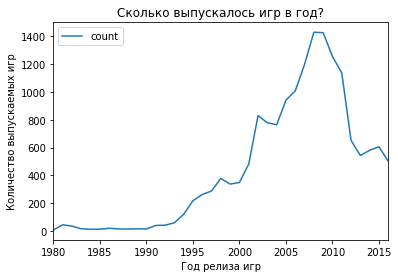

In [28]:
games_per_year.plot(x='year_of_release', y='count')
plt.title('Сколько выпускалось игр в год?')
plt.xlabel('Год релиза игр')
plt.ylabel('Количество выпускаемых игр')
plt.show() 


Данные об играх собраны с 1980 по 2016 год. 

С 1980 по 1993 - видимо, начало эпохи игровой индустрии. В год выпускалось в среднем до 100 игр.

С 1994 по 2008 - стремительный взлет количества выпущенных игр.

2008-2009 гг. - пик производительности игр, очень много консолей, много запросов, много разных игр.

2010-2011 гг. - незначительное уменьшение количества игр в год, скорее всего, связано с началом анализа пользовательского выбора не только жанра игры, консоли, но и очевидных преимуществ той или иной игры.

C 2012 года наблюдалось значительное снижение количества игр в год (вдвое меньше, чем в 2011). В теории это может быть связано с тем, что производители игр начали работать больше над повышением качества игры, а не над количеством игр. Так как рынок расширяется, больше конкурентов, технологии развиваются, если не работать над качеством - компания обанкротиться. И одновременно производители консолей работают все больше над разработкой лучших решений для будущих консолей и будущих игр.

Также могло повлиять на изменение стратегии в ценообразовании - сделали цены на игры более доступными, при этом ввели разнообразные платные утилиты внутри игры - платные артефакты, платный выбор машин и т.д. То есть начали зарабатывать деньги внутри игры.

Можно сделать вывод, что для анализа необходимо брать данные с 2012 года, так как этот момент был переломным в выборе стратегии разработки и выпуска игр.

### Сколько времени платформа существует на рынке?
*Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?*

In [29]:
# Создадим сводную таблицу, где будут данные о суммарных продажах по платформам.
sales_platform = games.pivot_table(index='platform', values='global_sales', aggfunc='sum').sort_values('global_sales', ascending=False)
# Удаляем индекс-платформа для дальнейшей работы со столбцом.
sales_platform = sales_platform.reset_index(['platform'])
display(sales_platform.head(15))

# Создадим список с 5 наиболее успешными платформами 
top_platform_sales = sales_platform[:6]['platform']
print(top_platform_sales)



,platform,global_sales
0,PS2,1247.28
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.79
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.54
9,3DS,257.81


0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object


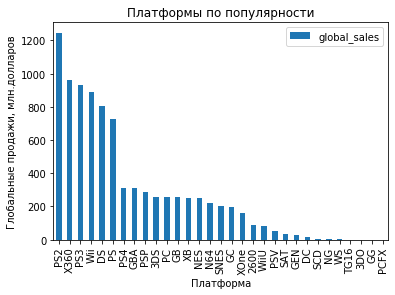

In [30]:
sales_platform.plot(x='platform', y='global_sales', kind='bar')
plt.title('Платформы по популярности')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн.долларов')
plt.show() 

In [31]:
# Создадим сводную таблицу, где будут содержаться сведения о продажах по годам по самым успешным платформам за все время
top_platform_stat_year = games.query('platform in @top_platform_sales').pivot_table(
    index=['platform', 'year_of_release'], values='global_sales', aggfunc='sum')

display(top_platform_stat_year)

# Удалим индекс с годом выпуска игр, так как этот столбец нужен для визуализации данных
top_platform_stat_year = top_platform_stat_year.reset_index()


global_sales
platform year_of_release              
DS       1985                     0.02
         2004                    17.27
         2005                   130.14
         2006                   119.81
         2007                   146.94
...                                ...
X360     2012                    99.74
         2013                    88.58
         2014                    34.74
         2015                    11.96
         2016                     1.52

[67 rows x 1 columns]

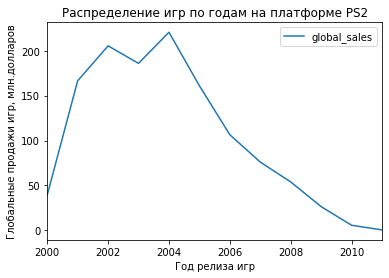

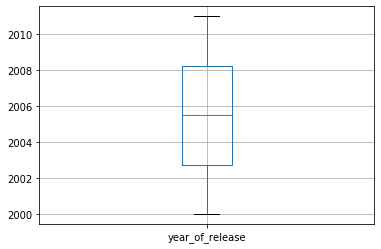

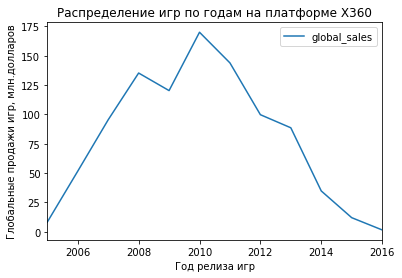

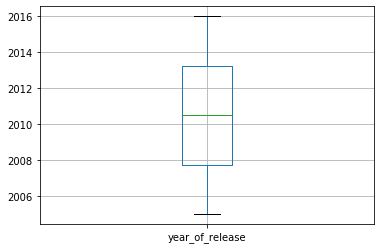

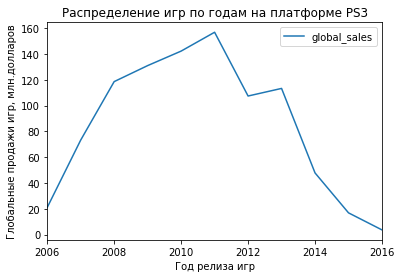

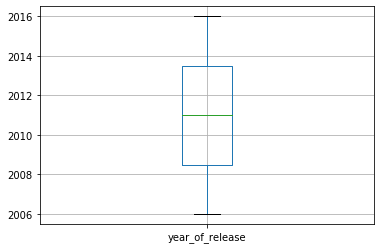

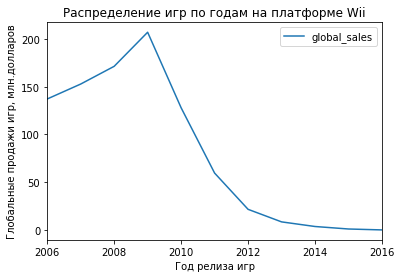

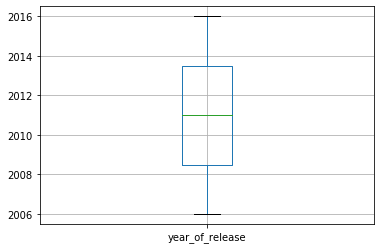

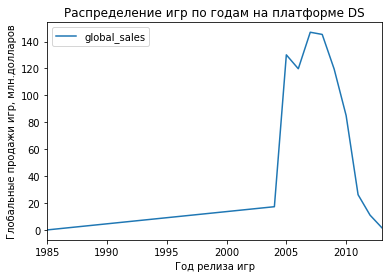

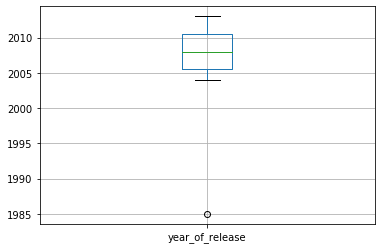

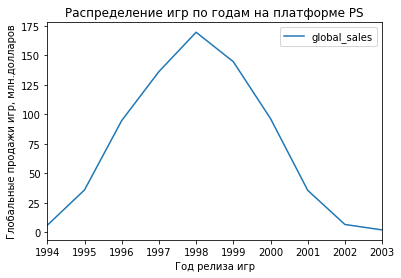

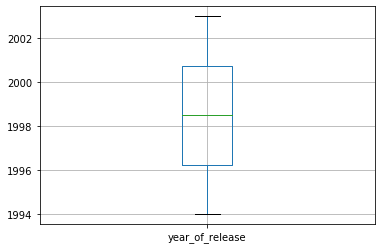

In [32]:
for x in top_platform_sales:
    # Для каждой из успешных платформ посмотрим bar диаграмму 
    top_platform_stat_year.loc[top_platform_stat_year.platform == x].plot(x='year_of_release', y='global_sales')
    plt.title('Распределение игр по годам на платформе '+x)
    plt.xlabel('Год релиза игр')
    plt.ylabel('Глобальные продажи игр, млн.долларов')
    plt.show()
    top_platform_stat_year.loc[top_platform_stat_year.platform == x].boxplot('year_of_release')

    

Отчетливо видень выброс в распределении по годам продаж платформы `DS` исключим это значение для чистоты анализа.

In [33]:
top_platform_stat_year[top_platform_stat_year.platform == 'DS'] = top_platform_stat_year[
    top_platform_stat_year.platform == 'DS'].query('year_of_release > 1985')

In [34]:
for x in top_platform_sales:
    max_value = top_platform_stat_year.loc[top_platform_stat_year.platform == x, 'year_of_release'].max()
    min_value = top_platform_stat_year.loc[top_platform_stat_year.platform == x, 'year_of_release'].min()
    if max_value < 2016:
        print('Продолжительность жизни платформы {} составляет {} лет'.format(x, max_value-min_value))
    else:
        continue
    max_sale = top_platform_stat_year.loc[top_platform_stat_year.platform == x, 'global_sales'].max()
    row = top_platform_stat_year.index[top_platform_stat_year.global_sales == max_sale]
    max_sale_year = top_platform_stat_year.loc[row]['year_of_release'].values
    print('Максимальная прибыль составила {:.2f} млн. долларов'.format(max_sale))
    print('Данная прибыль была зафиксирована на {} году существования платформы'.format(int(max_sale_year - min_value)))
    print()

Продолжительность жизни платформы PS2 составляет 11.0 лет
Максимальная прибыль составила 220.55 млн. долларов
Данная прибыль была зафиксирована на 4 году существования платформы

Продолжительность жизни платформы DS составляет 9.0 лет
Максимальная прибыль составила 146.94 млн. долларов
Данная прибыль была зафиксирована на 3 году существования платформы

Продолжительность жизни платформы PS составляет 9.0 лет
Максимальная прибыль составила 169.49 млн. долларов
Данная прибыль была зафиксирована на 4 году существования платформы



Кажется, что не все платформы из 5 топ-платформ с наиболее высокими продажами за приведенные года, до сих пор выпускают игры. Некоторые из них сдулись еще до 2013 года. 

В целом, через 10 лет новая платформа исчезнет. Видимо, всему виной все новые технологии. При этом пик доходности приходится на 3-4 году после старта (после того, как пользователи оценили платформу и игры на ней, вошли во вкус).


### Определение актуального периода
*Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.*

Согласно анализу по выпуску игр в год, для анализа необходимо брать данные с 2012 года, так как этот момент был переломным в выборе стратегии разработки и выпуска игр: компании стали больше ориентироваться на качестве игр. К тому же, на рынке все больше конкурентов и стать успешным не так-то просто.

Благодя анализу продаж 5ти самых успешных платформ, удалось выяснить, что пик доходности, а значит, и продаж, приходится на 4-5 лет после старта. Следовательно, чтобы спрогнозировать продажи на 2017 год, необходимо взять данные с 2012-2013 года как минимум.

Следовательно, берем для анализа 4 года - 2012, 2013, 2014 и 2016 года.

In [35]:
games_actual = games.copy().query('year_of_release >= 2012')
display(games_actual)
games_actual.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
name               2885 non-null object
platform           2885 non-null object
year_of_release    2885 non-null int64
genre              2885 non-null object
na_sales           2885 non-null float64
eu_sales           2885 non-null float64
jp_sales           2885 non-null float64
other_sales        2885 non-null float64
critic_score       1311 non-null float64
user_score         1530 non-null float64
rating             1610 non-null object
global_sales       2885 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.0+ KB


### Какие платформы лидируют по продажам, растут или падают? 

In [36]:
games_actual_sales = games_actual.pivot_table(index=['platform', 'year_of_release'], values = 'global_sales', aggfunc='sum')
games_actual_sales = games_actual_sales.reset_index(['year_of_release'])

display(games_actual_sales.sample(5))

display(games_actual_sales[games_actual_sales.year_of_release == 2016].sort_values(by='global_sales', ascending=False))

,year_of_release,global_sales
platform,,
PSP,2013,3.14
XOne,2014,54.07
PS3,2014,47.76
X360,2012,99.74
PC,2013,12.38


,year_of_release,global_sales
platform,,
PS4,2016,69.25
XOne,2016,26.15
3DS,2016,15.14
PC,2016,5.25
WiiU,2016,4.60
PSV,2016,4.25
PS3,2016,3.60
X360,2016,1.52
Wii,2016,0.18


На этом этапе можно выявить те платформы, игры на которых были представлены на рынке в 2016 году. Их 9 штук, при том, что платформа WII вряд ли будет популярной в 2017 году. Построим графики распределения глобальных продаж по годам по каждой платформе, чтобы четче представлять потенциально прибыльные компании.

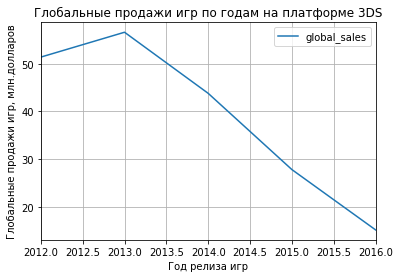

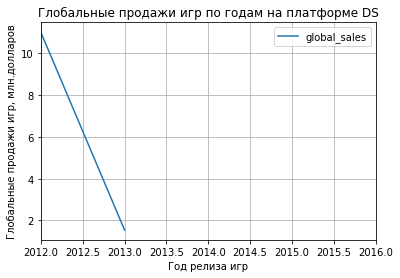

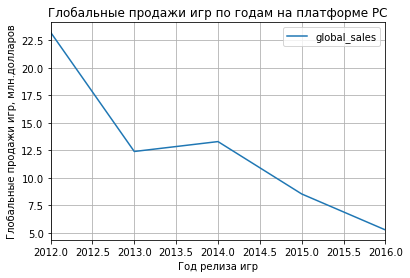

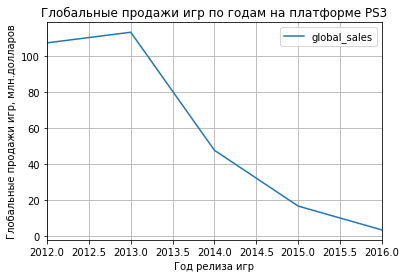

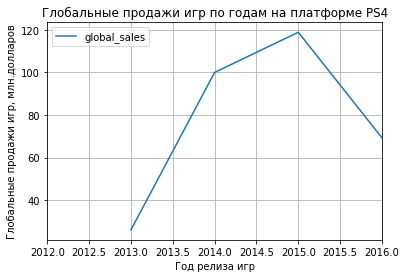

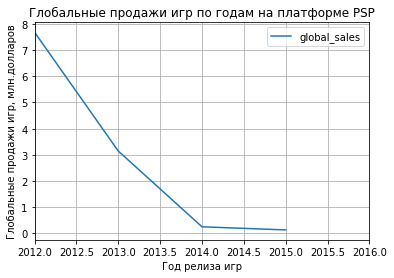

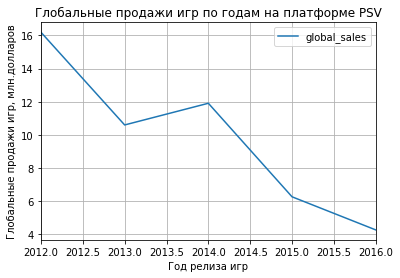

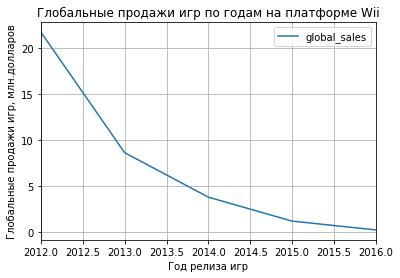

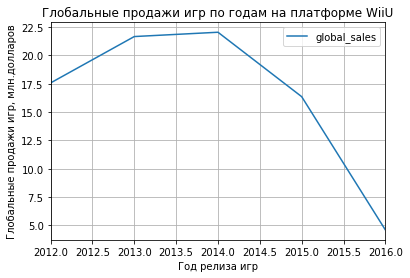

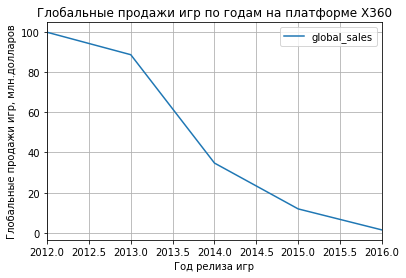

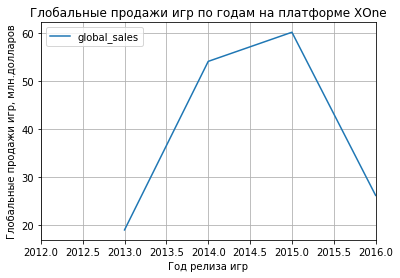

In [37]:
for x in games_actual_sales.index.drop_duplicates():
    games_actual_sales.loc[x].plot(x = 'year_of_release', y = 'global_sales', grid = True,
                                  xlim=(2012, 2016))
    plt.title('Глобальные продажи игр по годам на платформе '+x)
    plt.xlabel('Год релиза игр')
    plt.ylabel('Глобальные продажи игр, млн.долларов')
    plt.show()

Выходит, что продажи у всех платформ падают. Скорее всего, ввиду развития получения прибыли не за счет продажи игр, а за счет внедрения платных утилит, персонажей и артефактов внутри игры. Плюс - платформа сама по себе стоит дорого, а еще VR-очки, например, нужны. Также причина может быть в том, что за 2016 год известны не все данные.

Тем не менее, можно выделить следующие потенциально прибыльные платформы, которые выделяются на фоне остальных:
3DS, PS4, XOne.

У данных платформ продажи за 2016 год - более 14 млн.долларов в год. 

Для последующего анализа оставим те платформы, у которых были продажи в 2016 году более 1 млн.долларов в год. Их 8.

In [38]:
games_actual_sales_2016 = games_actual_sales[
    (games_actual_sales.year_of_release == 2016)
    & (games_actual_sales.global_sales > 1)].sort_values(
        by='global_sales', ascending=False)

games_actual = games_actual.query('platform in @games_actual_sales_2016.index')
display(games_actual)

row_platforms_2017 = []
for x in games_actual.platform:
    if x in row_platforms_2017:
        continue
    else:
        row_platforms_2017.append(x)
        
print(row_platforms_2017)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']


### Как распределяются глобальные продажиигр в разбивке по платформам?

Для начала посмотрим статистическое описание глобальных продаж по каждой из платформ.

In [39]:
games_actual.groupby('platform')['global_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PC,250.0,0.250600,0.494640,0.01,0.03,0.08,0.2400,5.14
PS3,492.0,0.586972,1.464141,0.01,0.05,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
PSV,411.0,0.119659,0.203011,0.01,0.02,0.05,0.1200,1.96
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09
X360,292.0,0.810068,1.712069,0.01,0.10,0.31,0.8700,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


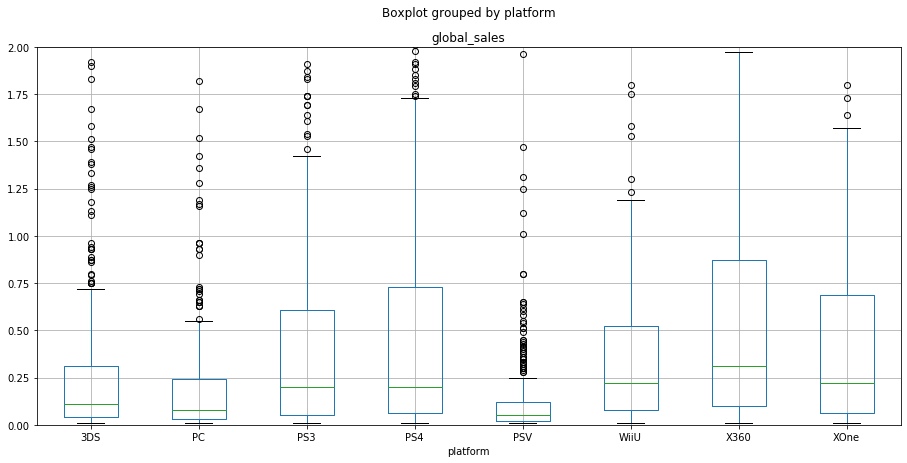

In [40]:
fig, ax = plt.subplots(figsize=(15,7));
games_actual.boxplot(by='platform', column='global_sales', ax=ax);
plt.ylim(0, 2);

##### Распределение объема глобальных продаж по платформам очень разное. 

У платформы X360 - самый высокий максимальный показатель глобальных продаж среди всех. Скорее всего, эта платформа была одной из самых популярных в истории, следом идут - PS4, XOne, PS3, WiiU, у которых максимальные продажи (судя по ящику с усами) обычно держались до 1.75 млн. долларов.

Остальные платформы имеют максимум ниже 0,75 млн.долларов, это: 3DS, PC и PSV.

При этом медианные продажи приблизительно одинаковы в этих двух группах платформ:

У PC и PSV - медианные продажи от 0.05 до 0,08 млн.долларов. 

У 3DS - 0,11 млн. долларов.

У остальных гигантов - от 0.2 до 0,31 млн. долларов.


In [41]:
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 16 to 16714
Data columns (total 12 columns):
name               2627 non-null object
platform           2627 non-null object
year_of_release    2627 non-null int64
genre              2627 non-null object
na_sales           2627 non-null float64
eu_sales           2627 non-null float64
jp_sales           2627 non-null float64
other_sales        2627 non-null float64
critic_score       1304 non-null float64
user_score         1506 non-null float64
rating             1554 non-null object
global_sales       2627 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 266.8+ KB


### Как влияют на продажи игр платформы `X360` отзывы пользователей и критиков?

Рассмотрим корреляцию продаж платформы X360 с отзывами пользователей и критиков.


,platform,global_sales,critic_score,user_score
23,X360,16.27,97.0,8.1
35,X360,13.68,83.0,4.8
60,X360,10.24,73.0,2.6
66,X360,9.71,87.0,7.0
72,X360,9.18,NaN,NaN


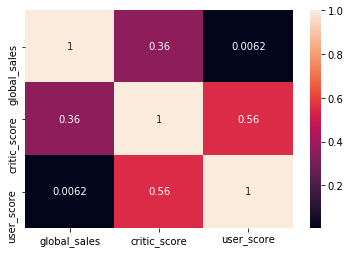

In [42]:
platforms_stat = games_actual[['platform', 'global_sales', 'critic_score', 'user_score']]

display(platforms_stat[platforms_stat.platform == 'X360'].head())

sns.heatmap(platforms_stat[platforms_stat.platform == 'X360'].corr(), annot=True)
plt.show()

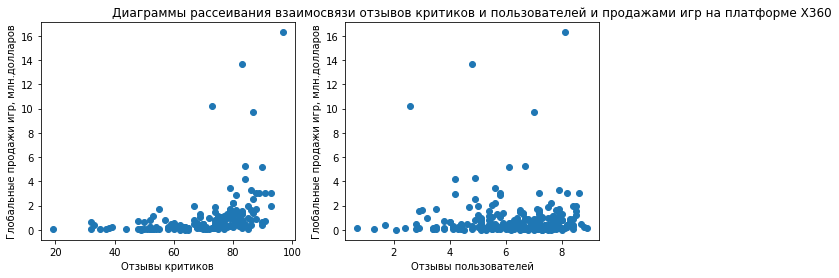

In [43]:
user_x360 = platforms_stat[platforms_stat.platform == 'X360']['user_score']
critic_x360 = platforms_stat[platforms_stat.platform == 'X360']['critic_score']
sales_x360 = platforms_stat[platforms_stat.platform == 'X360']['global_sales']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1.scatter(x=critic_x360, y=sales_x360)
ax1.set_xlabel('Отзывы критиков')
ax1.set_ylabel('Глобальные продажи игр, млн.долларов')
ax2.scatter(x=user_x360, y=sales_x360)
ax2.set_xlabel('Отзывы пользователей')
ax2.set_ylabel('Глобальные продажи игр, млн.долларов')
plt.title('Диаграммы рассеивания взаимосвязи отзывов критиков и пользователей и продажами игр на платформе X360')
plt.show()


#### Платформа `X360`:

Коэффициент корреляции Пирсона между продажами и отзывами пользователей ниже 0,1, что говорит об очень слабой корреляции, практически, ее отсутствия. Дейтсвительно, исходя из графика, можно заметить, что хоть у части игр чем выше оценка пользователей, тем выше продажи, все же бОльшая часть игр остаются на низком уровне продаж.

Взаимосвязь продаж и отзывов критиков стремится к средней положительной, видно, что чем выше оценка критиков, тем увеличивается вероятность высоких продаж, однако какая-то часть игр все же остается на низком уровне продаж, не смотря на высокий рейтинг.

Скорее всего, существует более сильная корреляция с другим параметром - жанром игры, например.


### Как влияют на продажи игр отзывы пользователей и критиков на различных платформах?

Исследование корреляции отзывов критиков и пользователей с продажами игр на платформе PS3


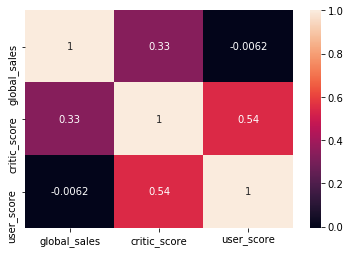

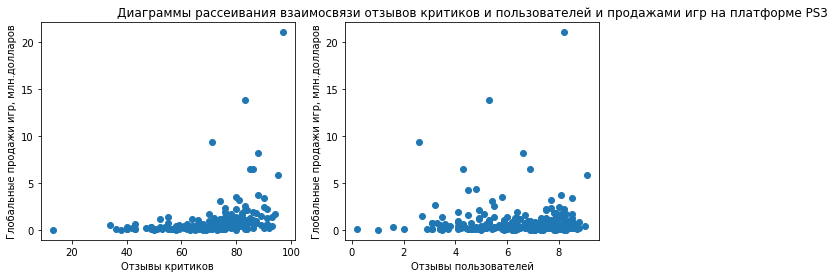

Исследование корреляции отзывов критиков и пользователей с продажами игр на платформе PS4


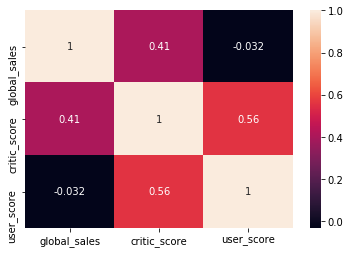

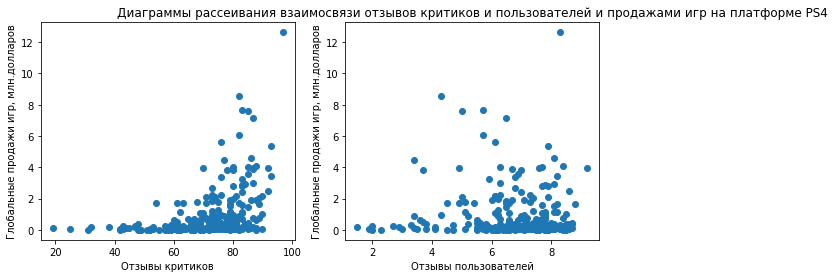

Исследование корреляции отзывов критиков и пользователей с продажами игр на платформе 3DS


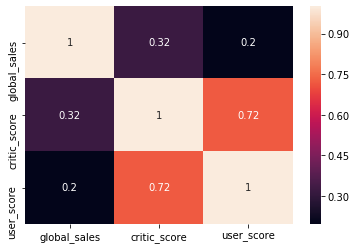

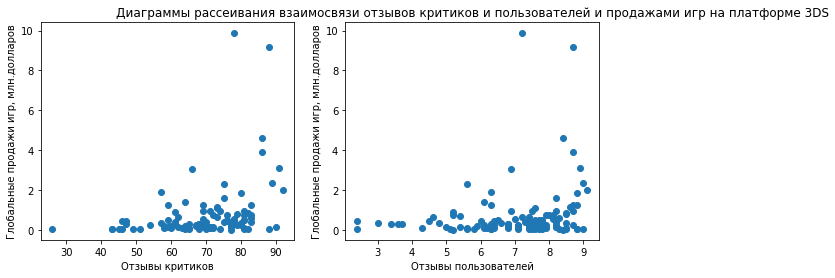

Исследование корреляции отзывов критиков и пользователей с продажами игр на платформе XOne


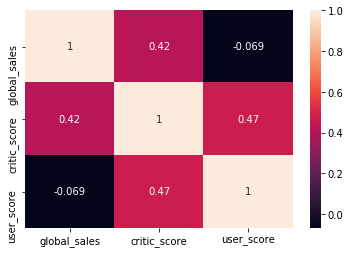

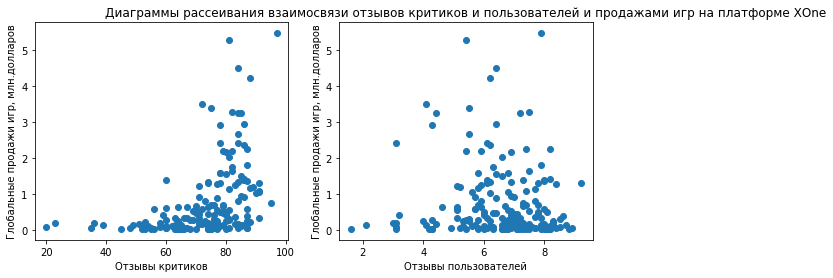

Исследование корреляции отзывов критиков и пользователей с продажами игр на платформе WiiU


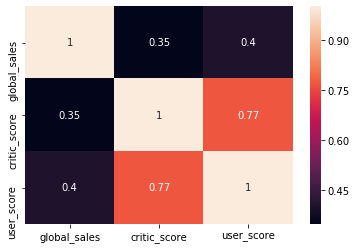

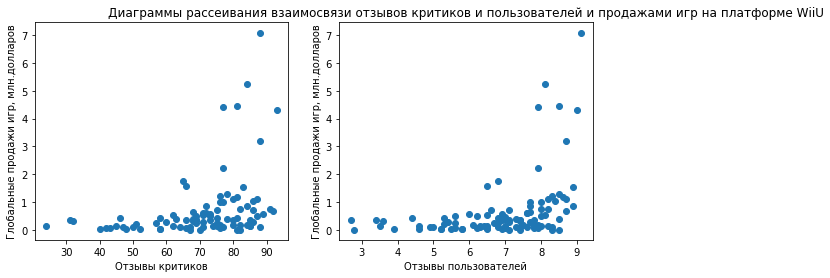

Исследование корреляции отзывов критиков и пользователей с продажами игр на платформе PC


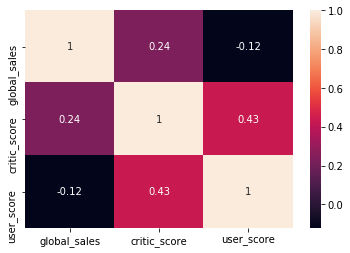

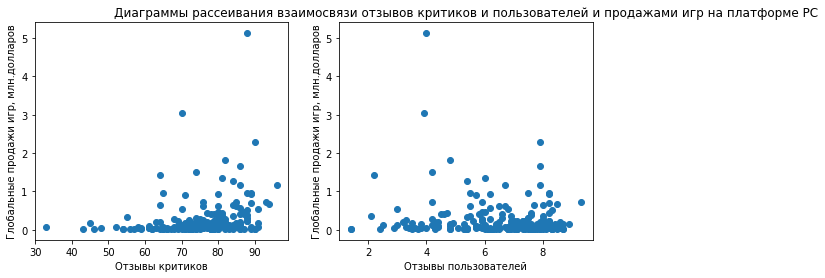

Исследование корреляции отзывов критиков и пользователей с продажами игр на платформе PSV


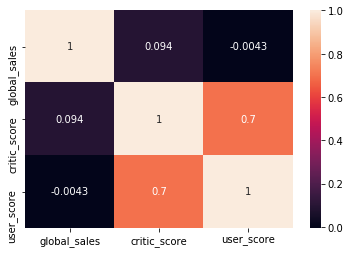

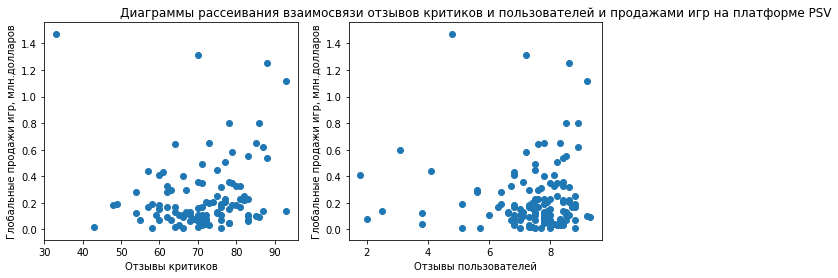

In [44]:
for x in row_platforms_2017:
    if x=='X360':
        continue
    else:
        print('Исследование корреляции отзывов критиков и пользователей с продажами игр на платформе '+x)
        
        sns.heatmap(platforms_stat[platforms_stat.platform == x].corr(), annot=True)
        plt.show()
        
        user = platforms_stat[platforms_stat.platform == x]['user_score']
        critic = platforms_stat[platforms_stat.platform == x]['critic_score']
        sales = platforms_stat[platforms_stat.platform == x]['global_sales']
        
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
        ax1.scatter(x=critic, y=sales)
        ax1.set_xlabel('Отзывы критиков')
        ax1.set_ylabel('Глобальные продажи игр, млн.долларов')
        ax2.scatter(x=user, y=sales)
        ax2.set_xlabel('Отзывы пользователей')
        ax2.set_ylabel('Глобальные продажи игр, млн.долларов')
        plt.title('Диаграммы рассеивания взаимосвязи отзывов критиков и пользователей и продажами игр на платформе '+x)
        plt.show()


#### Платформа `PS3`:

Взаимосвязь между отзывами данной платформы и самой популярной платформы `X360` практически одинакова. Это значит, что рейтинг критиков влияет на общие продажи игры больше (коэффициент показывает стремление к средней положительной взаимосвязи), чем пользователи (очень слабая положительная взаимосвязь). 

Отзывы пользователей практически не влияют на продажи, только если оценки очень мала (до 2).


#### Платформа `PS4`:

Рейтинг от пользователей вообще не влияет на продажи, коэффициент корреляции практически равне 0. 

При этом при оценке критиков выше среднего, продажи увеличиваются. Тем не менее, большая часть игр продаются на одном и том же низком уровне (до 0,5 млн долларов).

#### Платформа `3DS`:

На данной платформе прослеживается положительная слабая корреляция между отзывами критиков/пользователей и уровнем продаж игр. Оценки от критиков и пользователей практически не влияют на уровень продаж игр. 

Можно заметить, что при оценке ниже 6 игры продаются практически одинаково, в среднем на 0,5 млн долларов. При оценке выше среднего - продажи могут быть несколько выше.

Большая часть игр продаются в среднем на одном уровне, оценка критиков влияет слабо при оценке выше среднего.

#### Платформа `XOne`:

Взаимосвязь рейтинга от критиков и продажами положительная слабая, но стремится к средней. При оценке критиков выше среднего, вероятность более высоких глобальных продаж так же увеличивается, при этом большая часть игр примерно на одном уровне продаж.

Взаимосвязь пользовательских отзывов и глобальных продаж отрицательная и очень слабая, ее практически нет. Продажи большинства игр низки, хоть и существуют исключения при высоком рейтинге.


#### Платформа `WiiU`:

На данной платформе корреляция между отзывами и уровнем продаж слабая и положительная. При этом взавимосвязь между отзывами пользователей и критиков сильная положительная, что говорит о схожести взглядов. Чем выше оценка пользователей и критиков, тем больше вероятность увеличения продаж.


#### Платформа `PC`:

На данной платформе корреляции между отзывами критиков и продажами положительная и слабая. БОльшая часть игр продается на одном низком уровне, не смотря на оценку от критиков. Между тем, чем выше оценка, тем выше вероятность увеличения продаж.

Взаимосвязь между пользовательскими оценками и уровнем глобальных продаж очень слабая, данные оценки практически не оказывают никакого влияния на продажи.

#### Платформа `PSV`:

Данная платформа отличается от всех тем, что корреляция между отзывами критиков/пользователей отрицательная и очень низкая, практически равно 0, что говорит о очень слабой взаимосвязи.

Отзывы никак не влияют на продажи.


Практически у всех платформ прослеживается положительная слабая корреляция между отзывами критиков и уровнем продаж игр, за исключением платфомы PSV, у данной платформы отрицательная корреляция очень слабая, практически отсуствует.

На всех платформах взаимосвязь между оценкой пользователей и глобальными продажами игр очень слабая, взаимосвязи практически нет. За исключением платформы WiiU, где прослеживается слабая положительная корреляция между данными параметрами.

Интересно, что у эти двух платформ-исключений, существует положительная высокая корреляция между отзывами пользователей и критиков, что говорит о схожести этих взглядов, либо о меньшей распространенности среди обычных обывателей, играют на данной платформе только опытные геймеры, которые зачастую профессионально оценивают игру.

Скорее всего, существует другой фактор, влияющий больше на уровень глобальных продаж игр. Возможно, это жанр игры.

### Какие жанры самые прибыльные?

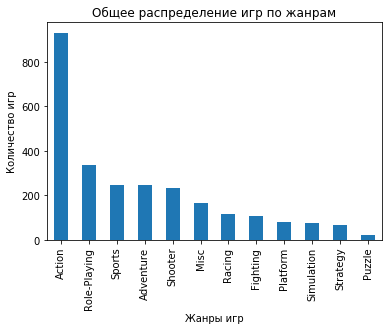

In [45]:
games_actual['genre'].value_counts().plot(kind='bar');
plt.title('Общее распределение игр по жанрам');
plt.xlabel('Жанры игр');
plt.ylabel('Количество игр');

Несомненным лидером за все года является жанр `Action`, следом идут `Role-Playing` и `Adventure`, `Sports` и  `Shooter'. Самым непопулярным жанром является `Puzzle` (Головоломки).

Рассмотрим распределение игр по жанрам по годам, по количеству игр и уровнем глобальных продаж. 

count                         sum                             
year_of_release  2012 2013 2014 2015 2016    2012    2013   2014   2015   2016
genre                                                                         
Action            188  137  182  247  178  107.10  119.72  96.15  71.71  30.11
Adventure          35   30   70   54   56    4.79    5.40   5.34   8.16   3.82
Fighting           26   19   23   21   16    8.84    7.07  15.85   7.90   4.47
Misc               26   31   39   38   31   10.78   21.12  21.35  10.62   2.42
Platform           11   32   10   13   15   18.37   21.60   8.81   6.05   3.23
Puzzle              6    3    7    6    1    0.96    0.96   1.49   0.71   0.01
Racing             29   16   27   18   24   13.60   12.37  16.66   8.07   2.79
Role-Playing       52   64   89   78   54   34.99   43.42  45.62  37.64  18.18
Shooter            48   59   47   34   47   71.75   62.04  65.21  67.51  38.22
Simulation         16   16   11   15   18   13.22    8.28   5.58   5.66   1.89
Sports             43   46   52   59   48   28.46   40.15  44.50  40.84  23.49
Strategy           12   17    8   16   13    2.57    5.84   0.98   1.85   1.13

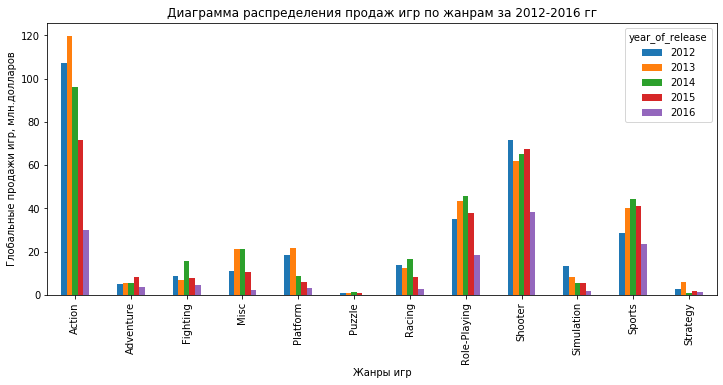

In [46]:
games_genre = games_actual.pivot_table(
    index='genre', columns='year_of_release', values='global_sales', aggfunc=['count', 'sum'])
display(games_genre)
games_genre['sum'].plot(kind='bar', figsize=(12,5));
plt.xlabel('Жанры игр');
plt.ylabel('Глобальные продажи игр, млн.долларов');
plt.title('Диаграмма распределения продаж игр по жанрам за 2012-2016 гг');

Из диаграммы можно заметить, что за последний год лидер среди жанров - `Action`, так и остался лидером, хоть его продажи в 2016 упали почти вдвое по сравнению с 2015 годом. 

Игры жанра `Shooter` вытеснили в 2016 году всех, встав на втором месте по уровню продаж, при этом по количеству выпущенных игр за все время данный жанр был на 5ом месте.

Упали продажи у жанров `Sports`, `Role-Playing`, тоже почти вдвоем и в 2016 году они заняли 3 и 4 место, соответственно.

На пятом месте `Fighting`, за все года данный жанр то снижался, что повышался в продажах примерно одинаково с `Adventure`.

Как итог, возможно стоит равняться на первые 6 самых прибыльных жанрах 2016 года, так как данные жанры не так критично низки в продажах 2016го года и, исходя из анализа предыдущих дат, могут еще набрать обороты в 2017 году.

Самый непопулярный жанр `Puzzle`, он же самый неприбыльный за период с 2012-2016 гг. чуть более успешные - `Strategy` и `Simulation`. Вряд ли эти жанры будут популярны и далее. На них ставку делать точно не следуют.


Рассмотрим динамику распределения продаж игр по жанрам на различных платформах. 

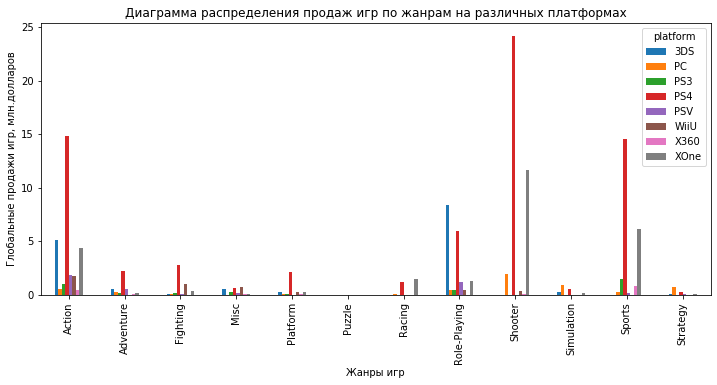

In [47]:
games_genre_2016 = games_actual.query('year_of_release == 2016').pivot_table(
    index=['genre'], columns=['platform'], values='global_sales', aggfunc=['count', 'sum'])

games_genre_2016['sum'].plot(kind='bar', figsize=(12,5));
plt.xlabel('Жанры игр');
plt.ylabel('Глобальные продажи игр, млн.долларов');
plt.title('Диаграмма распределения продаж игр по жанрам на различных платформах');

Набирающие популярность платформы `PS4` и `XOne` выпустили наиболее продаваемые игры популярных и прибыльных жанров - `Action`, `Sports` и `Shooter`. Также среди еще трех чуть менее прибыльных жанров у платформы `PS4` лидируют - `Role-Playing`, `Fighting`, `Adventure`. 

### Выводы

Для анализа необходимо брать данные с 2012 года, так как этот момент был переломным в выборе стратегии разработки и выпуска игр. В среднем с 2012 года выпускается 500-600 игр в год. 

Было выяснено, что в среднем платформа существует на рынке 9-10 лет, при том, что пик продаж приходится на 4-5 год существования платформы. 

Исходя из предыдущих пунктом, был выбран период для последующего анализа - 2012-2016 гг.

Gотенциально прибыльные платформы для 2017 года (так как продажи в 2016 году были не менее 1 млн.долларов -`PS3`, `X360`, `PS4`, `3DS`, `XOne`, `WiiU`, `PC`, `PSV`(начиная с потенциально наиболее прибыльной платформы).

Платформа `X360` была одной из самых популярных в истории среди всех ныне существующих платформ, в среднем игры продаются на 0,31 млн. долларов. Можно заметить, что в среднем игры на каждой из платформ продаются в общем на 0.2-0.25 млн долларов. На менее популярных платформах `3DS`, `PC` и `PSV` средний показатель меньше, до 0,11 млн. долларов. 

Практически у всех платформ прослеживается положительная слабая корреляция между отзывами критиков и уровнем продаж игр, взаимосвязь между оценкой пользователей и глобальными продажами игр очень слабая, взаимосвязи практически нет. Скорее всего, существует другой фактор, влияющий больше на уровень глобальных продаж игр - это жанр игры.

Набирающие популярность платформы `PS4` и `XOne` выпустили наиболее продаваемые игры популярных и прибыльных жанров - `Action`, `Sports` и `Shooter`. Также среди еще трех чуть менее прибыльных жанров у платформы `PS4` лидируют - `Role-Playing`, `Fighting`, `Adventure`.  

Самый непопулярный жанр `Puzzle`, он же самый неприбыльный за период с 2012-2016 гг. чуть более успешные - `Strategy` и `Simulation`. Вряд ли эти жанры будут популярны и далее. 

## <a id="step4">Шаг 4. Составление портрета пользователя каждого региона </a>

Для начала создадим таблицы для каждого региона со столбцами, необходимыми нам для этого шага.

In [48]:
games_actual_na = games_actual[['genre', 'platform', 'year_of_release', 'na_sales', 'global_sales', 'rating']]

games_actual_eu = games_actual[['genre', 'platform', 'year_of_release', 'eu_sales', 'global_sales', 'rating']]

games_actual_jp = games_actual[['genre', 'platform', 'year_of_release', 'jp_sales', 'global_sales', 'rating']]

### Какие платформы популярны в Северной Америке?

,global_sales,na_sales,ratio
platform,,,
X360,236.54,140.05,0.592077
PS4,314.14,108.74,0.346151
PS3,288.79,103.38,0.357976
XOne,159.32,93.12,0.584484
3DS,194.61,55.31,0.284209
WiiU,82.19,38.10,0.463560
PC,62.65,19.12,0.305188
PSV,49.18,10.98,0.223261


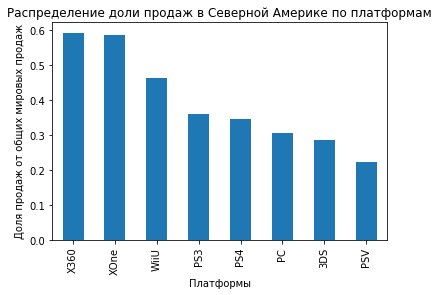

In [49]:
# Создание сводной таблицы с отображением суммарных продаж в регионе и глобальных продаж
games_actual_na_platform = games_actual_na.pivot_table(
    index='platform', values=['na_sales', 'global_sales'],
    aggfunc='sum')

# Подсчет доли продаж в регионе в продажах по всему миру
games_actual_na_platform['ratio'] = games_actual_na_platform['na_sales'] / games_actual_na_platform['global_sales']
games_actual_na_platform = games_actual_na_platform.sort_values(by='ratio', ascending=False)

display(games_actual_na_platform.sort_values(by='na_sales', ascending=False))

games_actual_na_platform['ratio'].plot(kind='bar');
plt.title('Распределение доли продаж в Северной Америке по платформам');
plt.xlabel('Платформы');
plt.ylabel('Доля продаж от общих мировых продаж');

Самые популярные платформы в Северной Америке примерно такие же, как по всему миру за 2012-2016 гг: `X360`, `PS4`, `XOne`, `PS3` и `3DS`. 

При этом продажи игр на платформах `Xbox` занимают более половины от общих продаж в мире, на `WiiU` - почти половину, а платформы от `Playstation` - 36%.

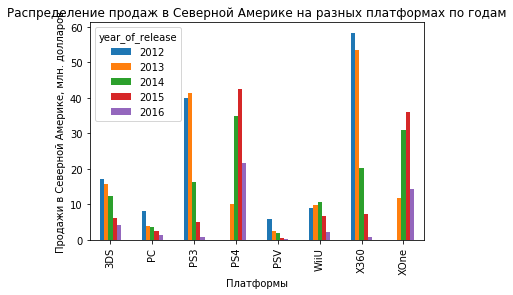

In [50]:
games_actual.pivot_table(index='platform', columns='year_of_release', values=['na_sales'],
    aggfunc='sum')['na_sales'].plot(kind='bar')
plt.title('Распределение продаж в Северной Америке на разных платформах по годам');
plt.xlabel('Платформы');
plt.ylabel('Продажи в Северной Америке, млн. долларов');
plt.show()



При этом `X360`, `PS4`, `XOne`, `PS3` и `3DS` не все года являлись безоговорочными лидерами. Были пики продаж игр на данных платформах, что и послужило причиной внесения их в топ-5 платформ.

Тем не менее, на 2016 год топ5 выглядит следующим образом: `PS4, XOne, WiiU, PC и 3DS`

### Какие платформы популярны в Европе?

,eu_sales,global_sales,ratio
platform,,,
PS4,141.09,314.14,0.449131
PS3,106.86,288.79,0.370027
X360,74.52,236.54,0.315042
XOne,51.59,159.32,0.323814
3DS,42.64,194.61,0.219105
PC,37.76,62.65,0.602713
WiiU,25.13,82.19,0.305755
PSV,11.36,49.18,0.230988


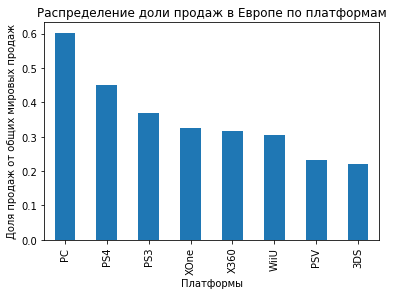

In [51]:
# Создание сводной таблицы с отображением суммарных продаж в Европе и глобальных продаж
games_actual_eu_platform = games_actual_eu.pivot_table(
    index='platform', values=['eu_sales', 'global_sales'],
    aggfunc='sum')

games_actual_eu_platform['ratio'] = games_actual_eu_platform['eu_sales'] / games_actual_eu_platform['global_sales']
games_actual_eu_platform = games_actual_eu_platform.sort_values(by='ratio', ascending=False)
display(games_actual_eu_platform.sort_values(by='eu_sales', ascending=False))

games_actual_eu_platform['ratio'].plot(kind='bar');
plt.title('Распределение доли продаж в Европе по платформам');
plt.xlabel('Платформы');
plt.ylabel('Доля продаж от общих мировых продаж');

Топ-5 самых популярных платформ в Европе за 2012-2016 гг: `PS4`, `PS3`, `X360`, `XOne` и `PC`. 

Что удивительно, так это доля продаж игр на платформе `PC` в Европе - около 65%. Следом идет `PS4` с показателем 41%. И тройку замыкает платформа `WiiU`.

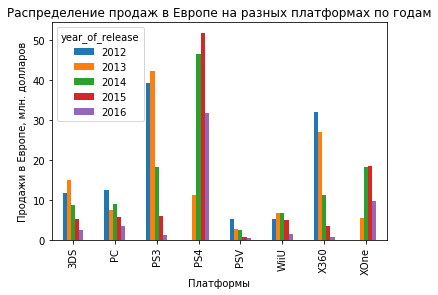

In [52]:
games_actual.pivot_table(index='platform', columns='year_of_release', values=['eu_sales'],
    aggfunc='sum')['eu_sales'].plot(kind='bar');
plt.title('Распределение продаж в Европе на разных платформах по годам');
plt.xlabel('Платформы');
plt.ylabel('Продажи в Европе, млн. долларов');
plt.show()

Топ-5 самых популярных платформ в Европе за 2012-2016 гг: `PS4`, `PS3`, `X360`, `XOne` и `PC`. 

Но с каждым годом ситуация меняется. На 2016 год платформами-лидерами в Европе стали: `PS4, XOne, PC, WiiU, PS3`. Платформы нового поколения `PlayStation` и `Xbox` постепенно вытесняют своих предшественников с рынка и тут.

### Какие платформы популярны в Японии?

,global_sales,jp_sales,ratio
platform,,,
3DS,194.61,87.79,0.451107
PS3,288.79,35.29,0.122200
PSV,49.18,21.04,0.427816
PS4,314.14,15.96,0.050805
WiiU,82.19,13.01,0.158292
X360,236.54,1.57,0.006637
XOne,159.32,0.34,0.002134
PC,62.65,0.00,0.000000


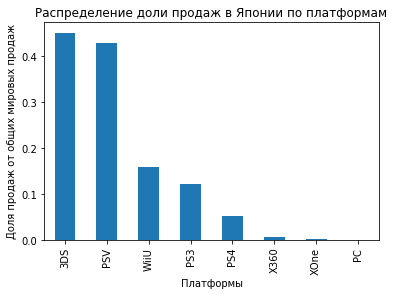

In [53]:
# Создание сводной таблицы с отображением суммарных продаж в Японии и глобальных продаж
games_actual_jp_platform = games_actual_jp.pivot_table(
    index='platform', values=['jp_sales', 'global_sales'],
    aggfunc='sum')

games_actual_jp_platform['ratio'] = games_actual_jp_platform['jp_sales'] / games_actual_jp_platform['global_sales']
games_actual_jp_platform = games_actual_jp_platform.sort_values(by='ratio', ascending=False)
display(games_actual_jp_platform.sort_values(by='jp_sales', ascending=False))

games_actual_jp_platform['ratio'].plot(kind='bar');
plt.title('Распределение доли продаж в Японии по платформам');
plt.xlabel('Платформы');
plt.ylabel('Доля продаж от общих мировых продаж');

Самые популярные платформы в Японии за 2012-2016 гг: `3DS`, `PS3`, `PSV`, `PS4` и `WiiU`. 

Сразу понятно, что такая, казалось бы, на первый взгляд, не очень прибыльная платформа `PSV` в Японии гораздо популярнее, чем в других регионах. И ожидаемо, что доля продаж игр на данной платформе - более 55% от общих мировых продажах. А следом идет платформа `3DS` с показателем 48%. Что тоже очень сильно отличается от других регионов. ну а дальше - `PS3` c 18% от глобальных продаж. Что удивительно, `PC` не продается вообще и `Xbox` очень непопулярен в Японии. Поддерживают отечественного производителя. `Nintendo` и `Playstation` - выбор японцев.

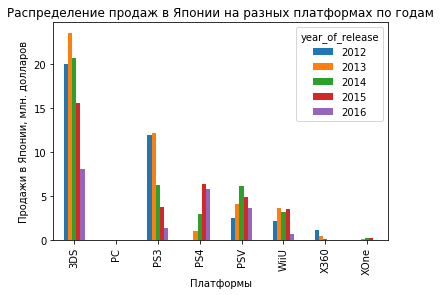

In [54]:
games_actual.pivot_table(index='platform', columns='year_of_release', values=['jp_sales'],
    aggfunc='sum')['jp_sales'].plot(kind='bar')
plt.title('Распределение продаж в Японии на разных платформах по годам');
plt.xlabel('Платформы');
plt.ylabel('Продажи в Японии, млн. долларов');
plt.show()

Топ-5 самых популярных платформ в Японии за 2012-2016 гг: `3DS`, `PS3`, `PSV`, `PS4` и `WiiU`. 

На 2016 год платформа `3DS` все по-прежнему удерживает первое место, а `PS4` сместила `PS3` на четвертое место. Американские приставки - большая редкость.

### Какие жанры популярны в Северной Америке?

,global_sales,na_sales,ratio
genre,,,
Action,424.79,170.91,0.402340
Shooter,304.73,144.77,0.475076
Sports,177.44,80.26,0.452322
Role-Playing,179.85,60.65,0.337225
Misc,66.29,29.36,0.442902
Platform,58.06,23.96,0.412677
Fighting,44.13,19.79,0.448448
Racing,53.49,17.22,0.321929
Adventure,27.51,8.88,0.322792


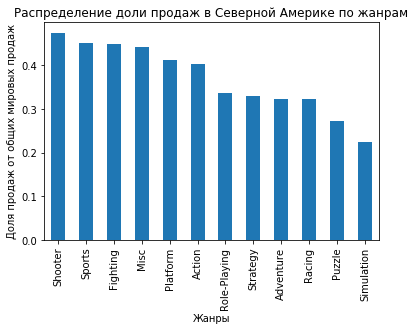

In [55]:
games_actual_na_genre = games_actual_na.pivot_table(
    index='genre', values=['na_sales', 'global_sales'],
    aggfunc='sum')
games_actual_na_genre['ratio'] = games_actual_na_genre['na_sales'] / games_actual_na_genre['global_sales']
games_actual_na_genre = games_actual_na_genre.sort_values(by='ratio', ascending=False)
display(games_actual_na_genre.sort_values(by='na_sales', ascending=False))

games_actual_na_genre['ratio'].plot(kind='bar');
plt.title('Распределение доли продаж в Северной Америке по жанрам');
plt.xlabel('Жанры');
plt.ylabel('Доля продаж от общих мировых продаж');

Топ-5 жанров по версии Северной Америки: `Action, Sports, Shooter, Role-Playing и Misc(или Аркада)`. Аркада - не самый популярный жанр в мире, но в Северной Америке считают по-другому.

При это тут больше всего играют в спортивные игры `Sports`(более 54% jn обoих продаж в мире), чуть меньше в - `Shooter, Fighting, Misc и Platform`. Платформеры и Аркада - это необычно.

Рассмотрим распределение по годам.

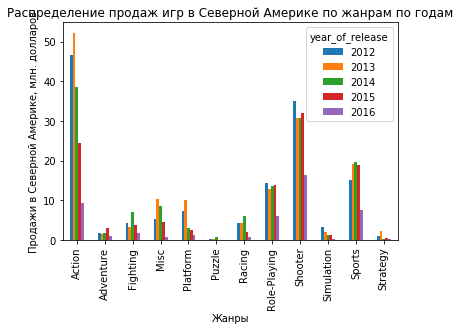

In [56]:
games_actual.pivot_table(index='genre', columns='year_of_release', values=['na_sales'],
    aggfunc='sum')['na_sales'].plot(kind='bar')
plt.title('Распределение продаж игр в Северной Америке по жанрам по годам');
plt.xlabel('Жанры');
plt.ylabel('Продажи в Северной Америке, млн. долларов');
plt.show()

В логические игры типа `Puzzle`, в стратегии `Strategy` и `Simulation` в Северной Америке всегда играли меньше всего.

При этом среди лидеров в 2016 году `Shooter` (В США разрешено оружие, поэтому Северная Америка любит пострелять даже в играх!), `Action, Sports, Role-Playing и Fighting`.

### Какие жанры популярны в Европе?

,eu_sales,global_sales,ratio
genre,,,
Action,155.03,424.79,0.364957
Shooter,113.47,304.73,0.372362
Sports,68.04,177.44,0.383454
Role-Playing,46.76,179.85,0.259994
Racing,27.28,53.49,0.510002
Platform,20.14,58.06,0.346883
Misc,19.37,66.29,0.292201
Simulation,14.41,34.63,0.416113
Fighting,10.79,44.13,0.244505


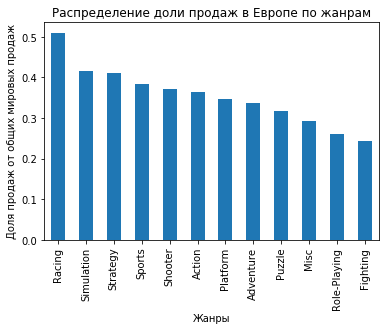

In [57]:
games_actual_eu_genre = games_actual_eu.pivot_table(
    index='genre', values=['eu_sales', 'global_sales'],
    aggfunc='sum')

games_actual_eu_genre['ratio'] = games_actual_eu_genre['eu_sales'] / games_actual_eu_genre['global_sales']
games_actual_eu_genre = games_actual_eu_genre.sort_values(by='ratio', ascending=False)
display(games_actual_eu_genre.sort_values(by='eu_sales', ascending=False))

games_actual_eu_genre['ratio'].plot(kind='bar');
plt.title('Распределение доли продаж в Европе по жанрам');
plt.xlabel('Жанры');
plt.ylabel('Доля продаж от общих мировых продаж');

Самые популярные 5 жанров в Европе за 2012-2016 гг: `Action, Shooter, Sports, Role-Playing и Racing`. Почти так же, как в Америке, только вместо Аркады - Гонки.

В игры жанра `Racing` тут играют намного чаще, чем в других регионах - продажи в Европе игр данного жанра занимают почти 55%. `Simulation` занимает чуть меньше - 46%, что тоже необычно для мира в целом. В отличии от Америки, тут любят `Strategy`(41% от общих мировых продаж). А в `Puzzle` тут почти не играют, как и в Северной Америке.

Рассмотрим распределение по годам.

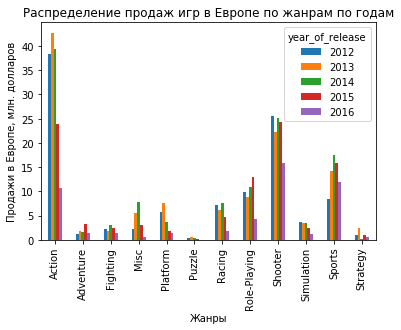

In [58]:
games_actual.pivot_table(index='genre', columns='year_of_release', values=['eu_sales'],
    aggfunc='sum')['eu_sales'].plot(kind='bar')
plt.title('Распределение продаж игр в Европе по жанрам по годам');
plt.xlabel('Жанры');
plt.ylabel('Продажи в Европе, млн. долларов');
plt.show();

За 2016 год топ-5 жанров в Европе выглядит так же, как и за все года с 2012 по 2016. - `Action, Shooter, Sports, Role-Playing и Racing`

### Какие жанры популярны в Японии?

,global_sales,jp_sales,ratio
genre,,,
Role-Playing,179.85,58.06,0.322825
Action,424.79,48.75,0.114763
Misc,66.29,11.35,0.171217
Simulation,34.63,10.27,0.296564
Shooter,304.73,9.23,0.030289
Fighting,44.13,9.08,0.205756
Platform,58.06,8.63,0.148639
Sports,177.44,6.92,0.038999
Adventure,27.51,6.56,0.238459


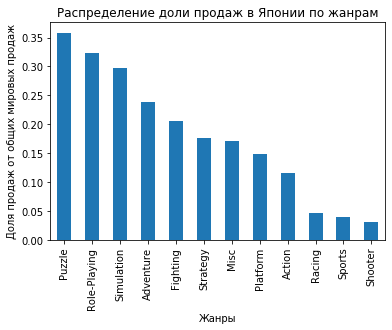

In [59]:
games_actual_jp_genre = games_actual_jp.pivot_table(
    index='genre', values=['jp_sales', 'global_sales'],
    aggfunc='sum')

games_actual_jp_genre['ratio'] = games_actual_jp_genre['jp_sales'] / games_actual_jp_genre['global_sales']
games_actual_jp_genre = games_actual_jp_genre.sort_values(by='ratio', ascending=False)

display(games_actual_jp_genre.sort_values(by='jp_sales', ascending=False))

games_actual_jp_genre['ratio'].plot(kind='bar');
plt.title('Распределение доли продаж в Японии по жанрам');
plt.xlabel('Жанры');
plt.ylabel('Доля продаж от общих мировых продаж');

Топ-5 жанров в Японии за 2012-2016 гг.: `Action, Role-Playing, Misc, Adventure, Sports`. В `Role-Playing` в Японии играют гораздо больше, чем в других регионах. При этом тут любят и Аркады, и Приключения.

Продажи игр в Японии жанра `Puzzle` занимают более 35% от общемировых продаж, может быть это всеми любимый Судоку? Следом идут РПГ с показателем более 30%. При этом в жанре `Racing` доля продаж в Японии занимает менее 2% от глобальных.

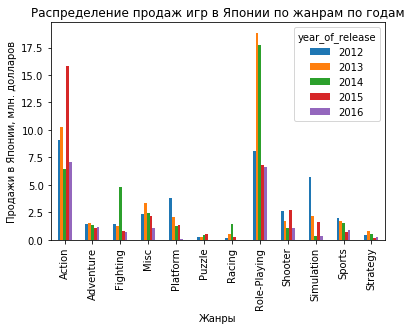

In [60]:
games_actual.pivot_table(index='genre', columns='year_of_release', values=['jp_sales'],
    aggfunc='sum')['jp_sales'].plot(kind='bar')
plt.title('Распределение продаж игр в Японии по жанрам по годам');
plt.xlabel('Жанры');
plt.ylabel('Продажи в Японии, млн. долларов');
plt.show();

В 2016 году продавали больше всего игры жанров В 2016 году продавали больше всего игры жанров `Action, Role-Playing, Adventure, Misc и Sports`. Отличий за 2012-2016 гг никаких, только `Adventure` и `Misc` поменялись местами.

Японский рынок игр очень сильно отличается от остального. Тут много факторов - и японская культура (не у каждой культуры в мире есть своя сверхпопулярная игра), и японская диджитализация (ведь как известно, Япония является передовой страной в области hi-tech), и непомерной страстью молодых людей Японии ко всем возможным играм. Это привередливые потребители, и игры, которые здесь успешны, скорее всего, тщательно переведены и локализованны под культуру, с изумительной графикой и тщательной проработкой уровней.

Японский рынок игр очень сильно отличается от остального. 

Тут много факторов - и японская культура (не у каждой культуры в мире есть своя сверхпопулярная игра), и японская диджитализация (ведь как известно, Япония является передовой страной в области hi-tech), и непомерной страстью молодых людей Японии ко всем возможным играм. Это привередливые потребители, и игры, которые здесь успешны, скорее всего, тщательно переведены и локализованны под культуру, с изумительной графикой и тщательной проработкой уровней.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### <a id="rating">Описание рейтинга ESRB </a>
* `E` - («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
* `M` - («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 
* `T` - («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. 
* `E10+` - («Everyone 10 and older») — «Для всех от 10 лет и старше».
* `K-A` - ("Kids to Adults") см. `EC`
* `AO` - («Adults Only 18+») — «Только для взрослых»
* `EC` - («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Первоначально "K-A" ("Kids to Adults")
* `RP` - («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.


In [61]:
print(games_actual.rating.unique())

['M' nan 'E' 'T' 'E10+']


С 2012 года рейтинги играм присуждали 4х видов: 
+ `E10+` - («Everyone 10 and older») — «Для всех от 10 лет и старше».
+ `M` - («Mature») — «Для взрослых»
+ `E` - («Everyone») — «Для всех» 
+ `T` - («Teen») — «Подросткам»

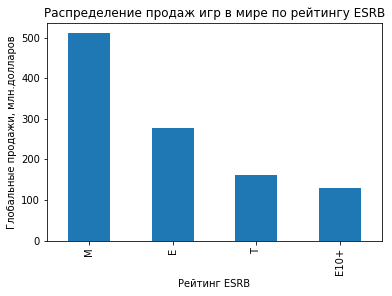

In [62]:
games_actual.pivot_table(index='rating', values='global_sales',
                         aggfunc='sum')['global_sales'].sort_values(
                             ascending=False).plot(kind='bar')
plt.title('Распределение продаж игр в мире по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Глобальные продажи, млн.долларов')
plt.show()

В мире покупают больше всего игры с рейтингом `Mature` - для взрослых, далее `Everyone` - для всех. Сначала взрослые играют, потом можно и с семьей поиграть.

#### Влияет ли рейтинг ESRB на продажи в Северной Америке?

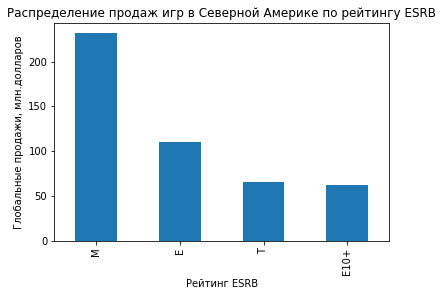

In [63]:
games_actual.pivot_table(index='rating', values='na_sales',
                         aggfunc='sum')['na_sales'].sort_values(
                             ascending=False).plot(kind='bar')
plt.title('Распределение продаж игр в Северной Америке по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Глобальные продажи, млн.долларов')
plt.show()

Игры с рейтингом `Mature` и `Everyone` охотнее берут в Северной Америке, как и во всем мире. На третьем месте - `E10+`, миожно поиграть со старшими детьми.

#### Влияет ли рейтинг ESRB на продажи в Европе?

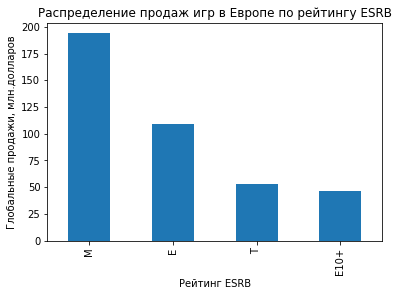

In [64]:
games_actual.pivot_table(index='rating', values='eu_sales',
                         aggfunc='sum')['eu_sales'].sort_values(
                             ascending=False).plot(kind='bar')
plt.title('Распределение продаж игр в Европе по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Глобальные продажи, млн.долларов')
plt.show()

Игры с рейтингом `Mature` также больше берут в Европе, а потом идет семейные игры и игры для подростков. Так же, как и в Северной Америке.

#### Влияет ли рейтинг ESRB на продажи в Японии?

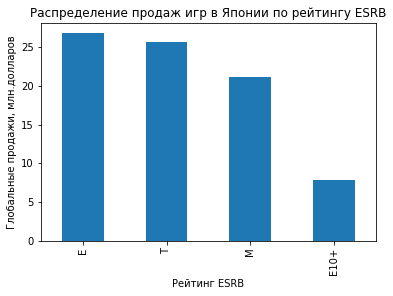

In [65]:
games_actual.pivot_table(index='rating', values='jp_sales',
                         aggfunc='sum')['jp_sales'].sort_values(
                             ascending=False).plot(kind='bar')
plt.title('Распределение продаж игр в Японии по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Глобальные продажи, млн.долларов')
plt.show()

Самые увлекающиеся тинейджеры-геймеры живут в Японии. Тут берут больше игры именно с такой маркировкой. Взрослые игры не так ценятся.

### Выводы

#### Портрет пользователя из Северной Америке

В Северной Америке любят играть в `Xbox`, `PlayStation` и `Nintendo`. Так как Xbox - это американский производитель, более половины мировых продаж платформ XOne и X360 приходится на Северную Америку.

Топ-5 жанров по версии Северной Америки: `Action, Sports, Shooter, Role-Playing и Misc(или Аркада)`. В 2016м году в лидеры выбились игры жанра `Shooter`. При это доля продаж жанра `Sports` в Северной Америке - более 54% от общиx продаж в мире. Получается, жители Северной Америки больше всех любят стрелять и заниматься спортом онлайн. Это удобно. 

Игры с рейтингом `Mature` и `Everyone` охотнее берут в Северной Америке, как и во всем мире. На третьем месте - `E10+`, миожно поиграть со старшими детьми.

#### Портрет пользователя из Европе

Европейский пользователь любит `PlayStation` больше, чем `Xbox`. А `Xbox` чуть больше, чем `PC`. A `Nintendo` - после всех.

В Европе больше всего в мире покупают игры на платформе `PC`- около 65% от общемировых продаж. А также чуть меньше - 41 % - игры на платформе `PS4`. 

Самые популярные 5 жанры в Европе за 2012-2016 гг: `Action, Shooter, Sports, Role-Playing и Racing`. В Европе больше всех в мире покупают игры жанров `Racing, Stimulation и Strategy`.А в `Puzzle` тут почти не играют, как и в Северной Америке.

Игры с рейтингом `Mature` также больше берут в Европе, а потом идет семейные игры и игры для подростков. Так же, как и в Северной Америке.

#### Портрет пользователя из Японии

В стране восходящего солнца с большим отрывом лидирует `3DS` среди самых популярных платформ. Следом идут приставки `Playstation`, также японского производства. Японские геймеры поддерживают отечественного производителя.

Топ-5 жанров в Японии за 2012-2016 гг.: `Action, Role-Playing, Misc, Adventure, Sports`. В `Role-Playing` в Японии играют гораздо больше, чем в других регионах. При этом тут любят и Аркады, и Приключения. Также пользователи из Японии чаще всего в мире любят играть в игры жанра `Puzzle`, что занимают более 35% от общемировых продаж, может быть это всеми любимый Судоку? При этом гонять онлайн в `Racing` японцы не любят вообще (около 2% от общих продаж).

Самые увлекающиеся тинейджеры-геймеры живут в Японии. Тут берут больше игры именно с такой маркировкой. Взрослые игры не так ценятся.

## <a id="step5">Шаг 5. Проверка гипотез </a>

### Равны ли средние пользовательские рейтинги платформ Xbox One и PC?

Сформулируем нулевую гипотезу:

Средние пользовательские рейтинги платформ Xbox One и PC равны.

`X_xbox == X_pc`

Сформулируем альтернативную гипотезу:

Средние пользовательские рейтинги платформ Xbox One и PC различаются.

`X_xbox != X_pc`

Примем за `alpha` значение, равное 0.5

In [66]:
X_xbox = games_actual[games_actual['platform']=='XOne']['user_score']
X_pc = games_actual[games_actual['platform']=='PC']['user_score']

alpha = 0.05

Для того, чтобы использовать критерий Стьюдента для проверки статистической гипотезы, необходимо убедиться, что дисперсии двух выборок гомогенны и наши распределения нормальны. Для этого взглянем проведем тест Левене и построим QQ-plot.

In [67]:
stat, p_value = st.levene(X_xbox.dropna(), X_pc.dropna())

print(p_value)

if (p_value < 0.05):
    print('Отвергаем гипотезу о равности дисперсий двух выборок')
else:
    print('Не удалось отвергнуть гипотезу о равности дисперсий двух выборок')


0.01251484281850554
Отвергаем гипотезу о равности дисперсий двух выборок


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64


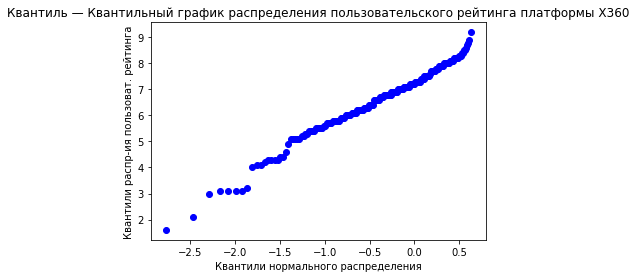

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


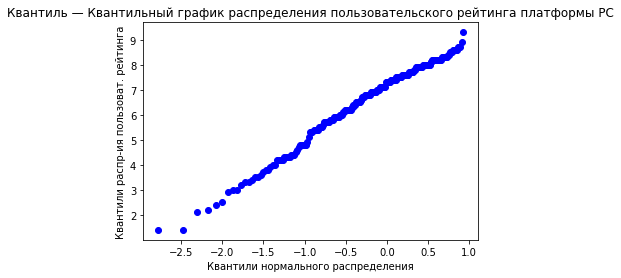

In [68]:
print(X_xbox.describe())

st.probplot(X_xbox, plot=plt);
plt.title('Квантиль — Квантильный график распределения пользовательского рейтинга платформы X360');
plt.xlabel('Квантили нормального распределения');
plt.ylabel('Квантили распр-ия пользоват. рейтинга');
plt.show();

print(X_pc.describe())

st.probplot(X_pc, plot=plt);
plt.title('Квантиль — Квантильный график распределения пользовательского рейтинга платформы PC');
plt.xlabel('Квантили нормального распределения');
plt.ylabel('Квантили распр-ия пользоват. рейтинга');
plt.show();

Стандартные отклонения почти равны, QQ-plot двух жанров показал нам, что распределение нормальное, выбросов не имеется. Тем не менее, учитывая негомогенность дисперсий данных выборок, следует применять критиерий Манна Уитни.

In [69]:

stat, p_value = st.mannwhitneyu(X_xbox.dropna(), X_pc.dropna())

print(p_value)

if (p_value < 0.05):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


0.4324531487349707
Не удалось отвергнуть нулевую гипотезу


Полученное значение p-value показывает, что отклонив нулевую гипотезу, мы ошибемся в 43 % случаев. 

Следовательно, мы можем предположить, что средне оценки пользователей платформ `X360` и `PC` равны.

### Различаются ли средние пользовательские рейтинги жанров Action и Sports?

In [70]:
X_action = games_actual[games_actual['genre']=='Action']['user_score']
X_sports = games_actual[games_actual['genre']=='Sports']['user_score']

alpha = 0.05

Сформулируем нулевую гипотезу:

Средние пользовательские рейтинги жанров `Action` и `Sports` равна.

`X_action == X_sports`

Сформулируем альтернативную гипотезу:

Средние пользовательские рейтинги жанров `Action` и `Sports` раличаются.

`X_action != X_sports`

Примем за `alpha` значение, равное 0.5

Для того, чтобы использовать критерий Стьюдента для проверки статистической гипотезы, необходимо убедиться, что наши распределения нормальны и диперсии двух выборок гомогенны. 

In [71]:
stat, p_value = st.levene(X_action.dropna(), X_sports.dropna())

print(p_value)

if (p_value < 0.05):
    print('Отвергаем гипотезу о равности дисперсий двух выборок')
else:
    print('Не удалось отвергнуть гипотезу о равности дисперсий двух выборок')


1.0755642211235576e-05
Отвергаем гипотезу о равности дисперсий двух выборок


count    513.000000
mean       6.845224
std        1.346473
min        2.000000
25%        6.300000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64


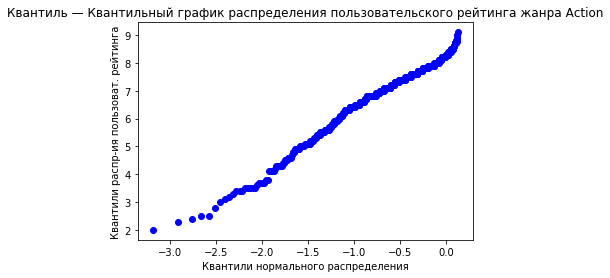

count    189.000000
mean       5.458201
std        1.744230
min        0.200000
25%        4.300000
50%        5.800000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


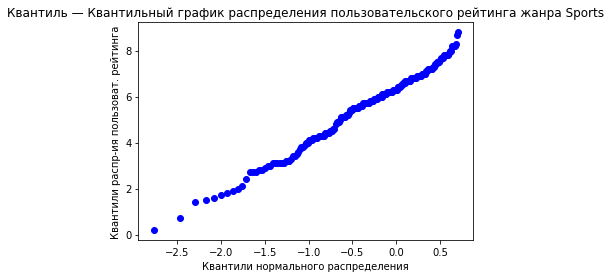

In [72]:
print(X_action.describe())

st.probplot(X_action, dist="norm", plot=plt)
plt.title('Квантиль — Квантильный график распределения пользовательского рейтинга жанра Action');
plt.xlabel('Квантили нормального распределения');
plt.ylabel('Квантили распр-ия пользоват. рейтинга');
plt.show();


print(X_sports.describe())

st.probplot(X_sports, dist="norm", plot=plt)
plt.title('Квантиль — Квантильный график распределения пользовательского рейтинга жанра Sports');
plt.xlabel('Квантили нормального распределения');
plt.ylabel('Квантили распр-ия пользоват. рейтинга');
plt.show();

Стандартные отклонения почти равны, QQ-plot двух жанров показал нам, что распределение нормальное, выбросов не имеется. Тем не менее, учитывая негомогенность дисперсий данных выборок, следует применять критиерий Манна Уитни.

In [73]:
stat, p_value = st.mannwhitneyu(X_action.dropna(), X_sports.dropna())

print(p_value)

if (p_value < 0.05):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


6.767167997274342e-24
Отвергаем нулевую гипотезу


Казалось, что пользователи одинаково любят игры жанров `Action` и `Sports` и средний пользовательский рейтинг равен, ведь это игры с высокой динамикой.

Однако, полученное значение p-value при проведении статистической проверки гипотезы стремится к 0. Это явно указывает на значимое различие между средними пользовательскими рейтингами этих двух жанров.

## <a id="step6">Шаг 6. Выводы </a>

Исходя из проведенного анализа, на успешность игры влияют следующие факторы, в сочетании с грамотной рекламной кампанией в различных регионах:

* **Платформа**. Платформа должна быть популярной среди пользователей. На данный момент в приоритете новые платформы `PS4`, `XOne`, следом идут остальные: `PS3`, `X360`, `3DS`, `WiiU`, `PC`, `PSV`. 

   * При этом для Северной Америки упор стоит сделать на `Xbox` (XOne, X360), `SonyPlaystation`(PS4, PS3) и на платформу компании `Nintendo` (3DS). 
   * Для Европы - на `SonyPlaystation`(PS4, PS3), `Xbox` (XOne, X360) и `PC`.
   * Япония больше ориентируется на `Nintendo`(3DS, WiiU) и `SonyPlaystation`(PS4, PS3, PSV) 
   

* **Жанр**. Это вторая немаловажная деталь. `Action, Sports, Shooter, Role-Playing, Misc, Adventure, 'Racing' - вот список самых популярных жанров в мире.

   * На североамериканском рынке `Action, Sports, Shooter, Role-Playing, Misc`. Пользователи любят по большей динамичные игры, но при этом не прочь поиграть в РПГ или Аркаду.
   * Для Европы - `Action, Shooter, Sports, Role-Playing, Racing`. Европейские геймеры больше любят стрелять, чем заниматься спортом онлайн. А еще в числе их любимых игр - игры с гонками.
   * Япония `Action, Role-Playing, Misc, Adventure, Sports`. Японские пользователи - любители приключений.
   

* **Рейтинг игры**. В мире наиболее востребованы игры для взрослых с рейтингом `Mature`, на втором месте - `Everyone` - игры, которые можно играть всей семьей. И только в Японии с большим отрывом лидируют игры для тинейджеров (`Teen`).


* **Отзывы критиков**. Практически всегда прослеживается положительная слабая корреляция между отзывами критиков и успешностью игры. То есть, чем выше оценка, тем больше вероятность высоких продаж игры. Однако, делать ставку только на отзывы критиков, не следует, только в сочетании с первыми двумя пунктами.


*Что касается такого фактора, как Отзывы пользователей. Очень слабая взаимосвязь с успешностью игр.* 

*При этом мы узнали, что средние оценки игр платформ `X360` и `PC` равны, не смотря на разницу в успешности игр этих платформ.
Средние пользовательские рейтинги жанров `Action` и `Sports` различаются, не смотря на то, что это два самых популярных динамичных жанра среди всех.*

*Что еще раз подтверждает, что отзывы пользователей - это слишком субъективная оценка для того, чтобы опираться на нее при принятии решений.*
